In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Load the dataset and look at first 5 lines
# Note in this dataset, SibSp = number of siblings/spouses aboard
# Parch = number of parents/children aboard

df = pd.read_csv("Titanic.csv", sep=",")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# Find shape (rows and columns) of data
df.shape

(891, 12)

In [46]:
# Check how many null values there are
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there is a lot of information missing from cabin. This column will be removed as 77% of the data is missing. This will not affect our observations, as the cabin will not give us much useful information, and we still have information on the class, etc.

In [47]:
df = df.drop("Cabin", axis='columns')

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

<Axes: ylabel='Age'>

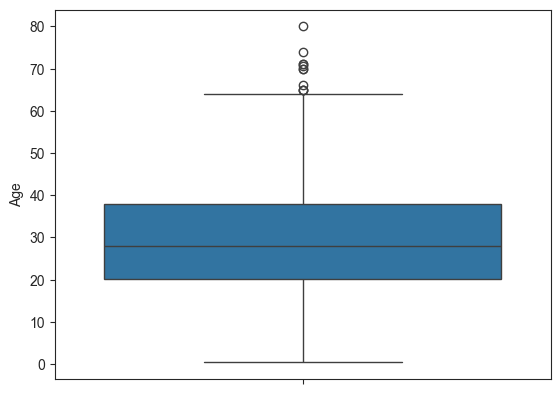

In [48]:
sns.boxplot(df["Age"])

As we have many missing values for age, we will find the average of the other ages and replace null values with these.

In [49]:
sum_age = np.sum(df["Age"])
count_age = 891 -177

print("The sum of all the ages in the dataset is ", sum_age)
print("The number of non-null values in the age column is ", count_age)

average_age = sum_age/count_age
average_age = average_age.round(0)

print("The average age in the datset is ", average_age)

The sum of all the ages in the dataset is  21205.17
The number of non-null values in the age column is  714
The average age in the datset is  30.0


In [50]:
# Replace null values in age by average age in dataset

df['Age'] = df['Age'].fillna(average_age)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Looking at the information we have available, we have decided the important columns for analysis: survived, Pclass, Sex, Age, SibSp, Parch, Fare(?)

In [52]:
# drop columns we have decided are unimportant for analysis
analysis_df = df.drop(columns = ["PassengerId", "Name", "Ticket", "Embarked"])

analysis_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


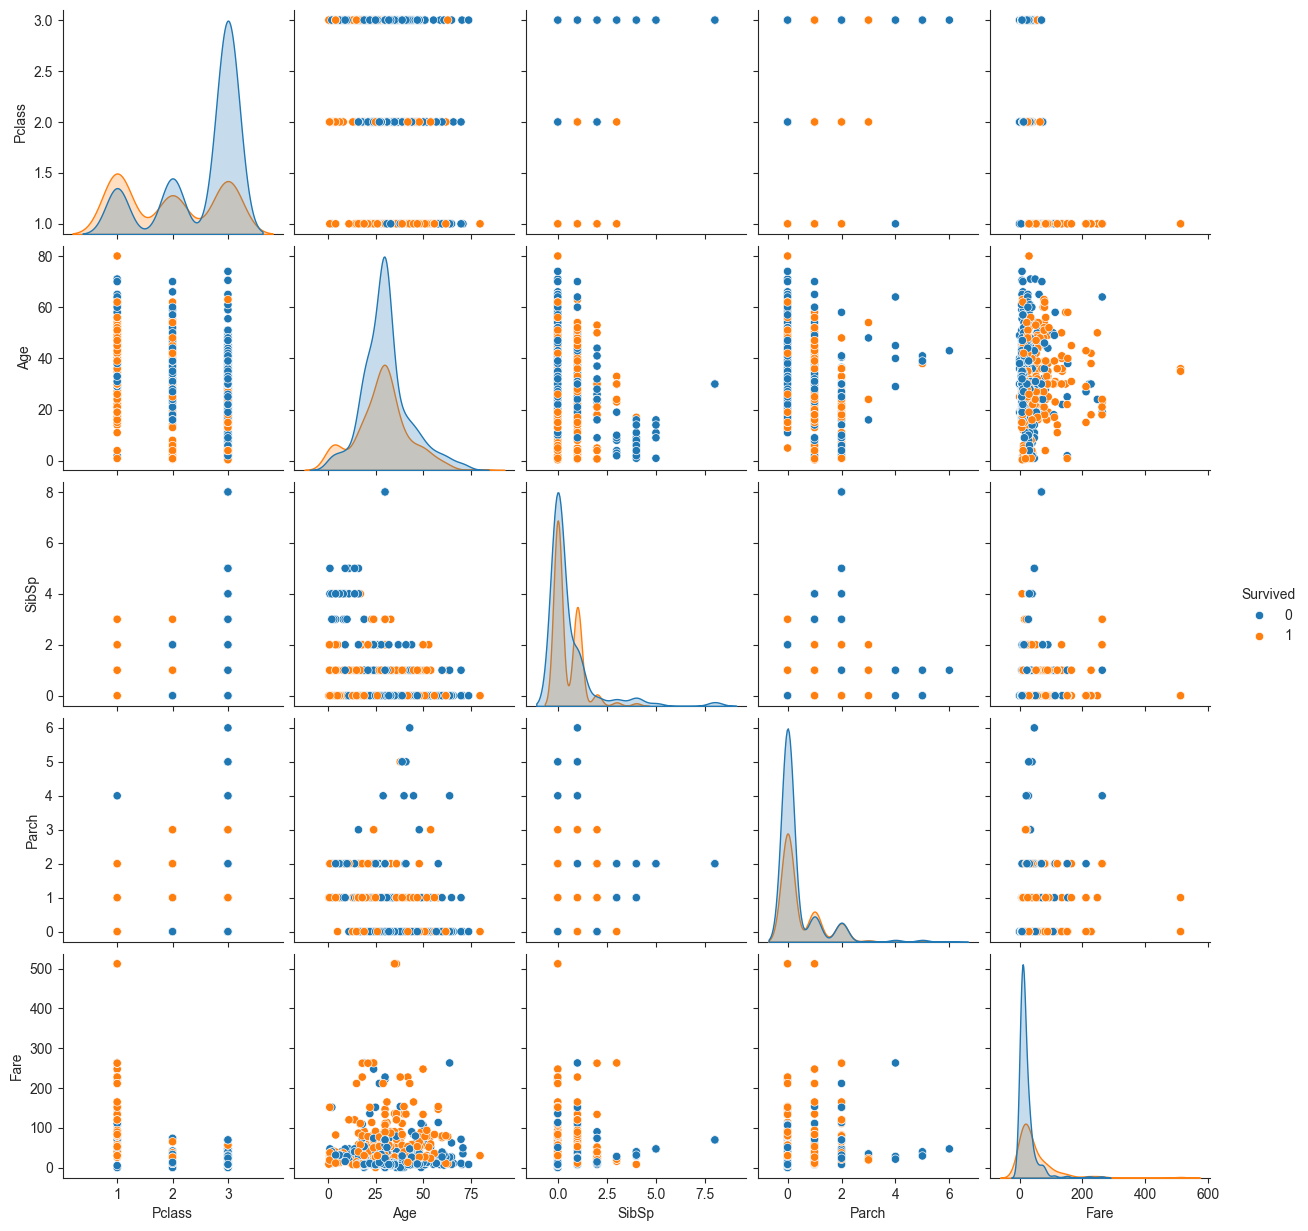

In [53]:
# Create a pairplot to show comparisons of all the numerical data we have left.
sns.pairplot(analysis_df, hue="Survived")

We will now analyse some of the data and correlations. First, we are looking at the average ages of each class using a boxplot.

<Axes: xlabel='Pclass', ylabel='Age'>

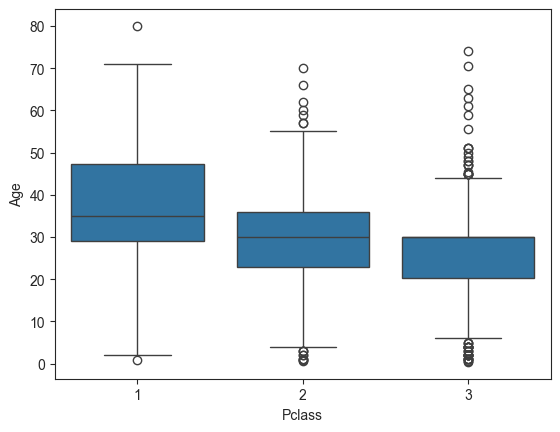

In [54]:
# Create a boxplot to demonstrate the spread of ages based on class
sns.boxplot(analysis_df, x = analysis_df["Pclass"], y = analysis_df["Age"])

We can see that on average, first class passengers are older than second and third class passengers. The first class passengers also have a wider spread in their ages. We can see lots of outliers in the ages of the third class passengers. This is likely due to us replacing null values of age with the average of ages. Third class passengers were less likely to have their ages recorded so many of these are an estimate.

We will now investigate the relationship between class and if a passenger survived.

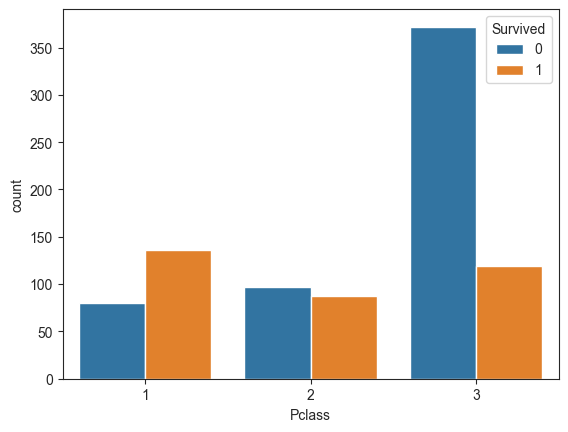

In [55]:
# Create a barchart to show how many people from each class survived
sns.countplot(analysis_df, x = analysis_df['Pclass'], hue = analysis_df['Survived'])
sns.set_style('ticks')

In the movie Titanic, upper-class passengers were given preference on lifeboats. This does show in the data, where first class passengers had the highest number of people surviving, as well as the highest proportion of people surviving. Around 60% of first class passengers survived, compared to just under 50% of second class passengers, and around 25% of third class passengers. Class was clearly an important factor in survival.

The next thing we will investigate is if sex had an impact on survival.

<Axes: xlabel='Sex', ylabel='count'>

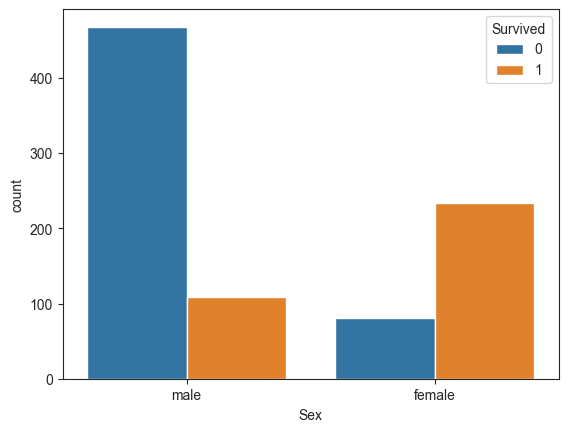

In [56]:
# Create a barchart to show how many people of each sex survived
sns.countplot(analysis_df, x=analysis_df['Sex'], hue=analysis_df['Survived'])

From this, we can see that females were more than twice as likely to survive as males. Approximately 75% of females survived, compared to just 20% of males.

We will now investigate if "women and children first" was true. We know that women were more likely to survive than men, so now we need to investigate if male children were likely to survive.

<Axes: xlabel='Age', ylabel='Sex'>

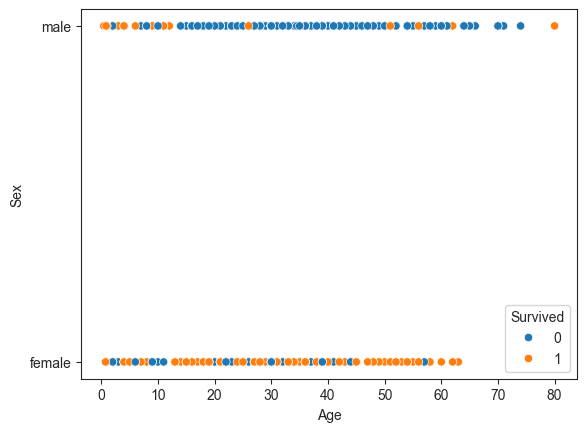

In [59]:
# Produce scatterplot of age vs sex to see who was likely to survive.
sns.scatterplot(data=df, x = "Age", y="Sex", hue = "Survived")

From the scatterplot above we can see that while some older males survived, the majority of men that survived were under the age of 15. As we can see, the majority of women survived and the majority of males under 15 survived, so we can confirm that it was women and children first.

The most important factor in determining survival of the Titanic incident is sex. 